In [39]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [40]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    
    strike_rate:float
    balls_per_boundary: float
    boundary_percentage: float
    summary: str

#### In parallel workflow, after the each node function, do not return the entire state because the same variables might be used in other nodes at the same time, which halted the execution and caused a deadlock. So, after each node function, simply return the updated value of the variable in key-value pair, not the entire state.

In [41]:
def strikeRate(state: BatsmanState) -> BatsmanState:
    sR = (state['runs'] / state['balls']) * 100 if state['balls'] > 0 else 0

    return {'strike_rate': sR} # type: ignore

In [42]:
def ballsPerBoundary(state: BatsmanState) -> BatsmanState:
    bPB = state['balls'] / (state['fours'] + state['sixes']) if (state['fours'] + state['sixes']) > 0 else 0

    return {'balls_per_boundary': bPB}  # type: ignore

In [43]:
def boundaryPercentage(state: BatsmanState) -> BatsmanState:
    bP = ((state['fours']*4 + state['sixes']*6) / state['runs']) * 100 if state['runs'] > 0 else 0
    
    return {'boundary_percentage': bP}  # type: ignore

In [44]:
def summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
    Total Runs: {state['runs']:.2f}
    Total Balls: {state['balls']:.2f}
    Fours: {state['fours']:.2f}
    Sixes: {state['sixes']:.2f}
    Strike Rate: {state['strike_rate']:.2f} %
    Balls per Boundary: {state['balls_per_boundary']:.2f} %
    Boundary Percentage: {state['boundary_percentage']:.2f} %
    """
    state['summary'] = summary
    return state

In [45]:
# make graph
graph = StateGraph(BatsmanState)

# add nodes
graph.add_node('strike_rate', strikeRate)

graph.add_node('balls_per_boundary', ballsPerBoundary)

graph.add_node('boundary_percentage', boundaryPercentage)

graph.add_node('summary', summary)

# add edges
graph.add_edge(START, 'strike_rate')
graph.add_edge(START, 'balls_per_boundary')
graph.add_edge(START, 'boundary_percentage')
graph.add_edge('strike_rate', 'summary')
graph.add_edge('balls_per_boundary', 'summary')
graph.add_edge('boundary_percentage', 'summary')
graph.add_edge('summary', END)

# compile graph
workflow = graph.compile()

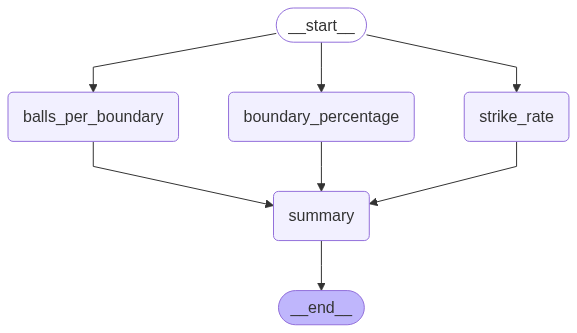

In [46]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [47]:
# initial state
initial_state = {'runs': 175, 'balls':66, 'fours':13, 'sixes':17}

# final state
final_state = workflow.invoke(initial_state) # type: ignore

print(final_state['summary'])


    Total Runs: 175.00
    Total Balls: 66.00
    Fours: 13.00
    Sixes: 17.00
    Strike Rate: 265.15 %
    Balls per Boundary: 2.20 %
    Boundary Percentage: 88.00 %
    
